# Seasonal ARIMA Models
> In this final chapter, you'll learn how to use seasonal ARIMA models to fit more complex data. You'll learn how to decompose this data into seasonal and non-seasonal parts and then you'll get the chance to utilize all your ARIMA tools on one last global forecast challenge. This is the Summary of lecture "ARIMA Models in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time-Series Analysis]
- image: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Seasonal time series
- Seasonal data
    - Has predictable and repeated patterns
    - Repeats after any amount of time
- Seasonal decomposition
    - time series = trend + seasonal + redisdual


### Seasonal decompose
You can think of a time series as being composed of trend, seasonal and residual components. This can be a good way to think about the data when you go about modeling it. If you know the period of the time series you can decompose it into these components.

In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case.

In [75]:
milk_production = pd.read_csv('./dataset/milk_production.csv', index_col='date', parse_dates=True)
milk_production = milk_production.asfreq('MS')
milk_production.head()

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


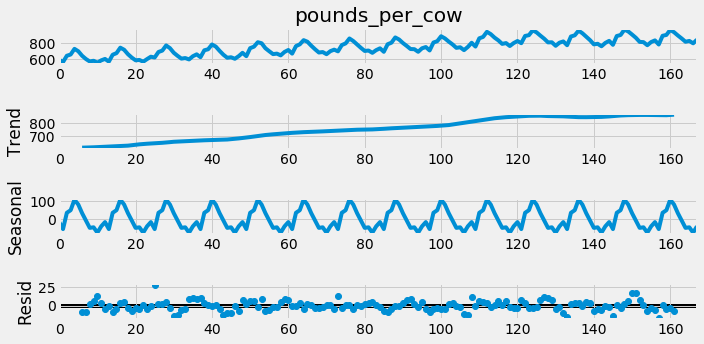

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], period=12)

# Plot decomposition
decomp.plot();
plt.tight_layout();

### Seasonal ACF and PACF
Below is a time series showing the estimated number of water consumers in London. By eye you can't see any obvious seasonal pattern, however your eyes aren't the best tools you have.

In [10]:
water = pd.read_csv('./dataset/water.csv', index_col='date', parse_dates=True)
water = water.asfreq('MS')
water.head()

,water_consumers
date,
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313


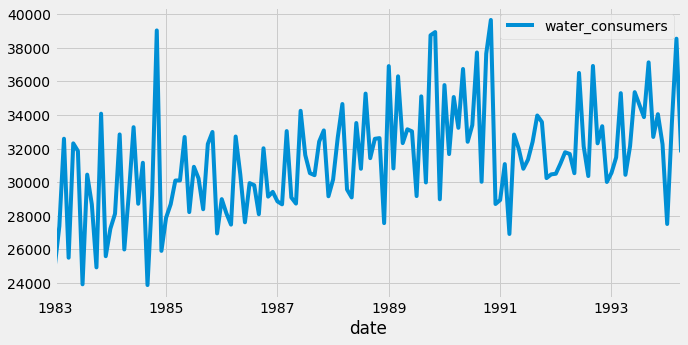

In [11]:
water.plot();

In this exercise you will use the ACF and PACF to test this data for seasonality. You can see from the plot above that the time series isn't stationary, so you should probably detrend it. You will detrend it by subtracting the moving average. Remember that you could use a window size of any value bigger than the likely period.

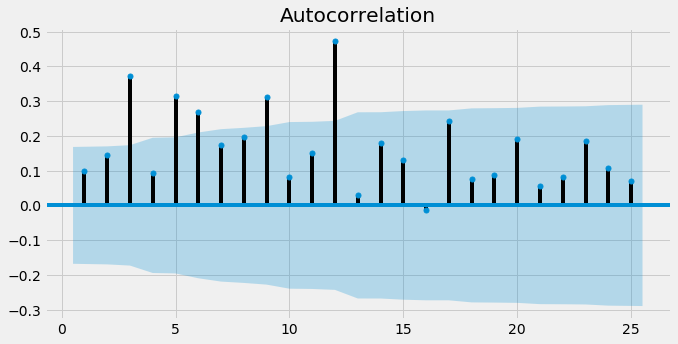

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False, ax=ax1);

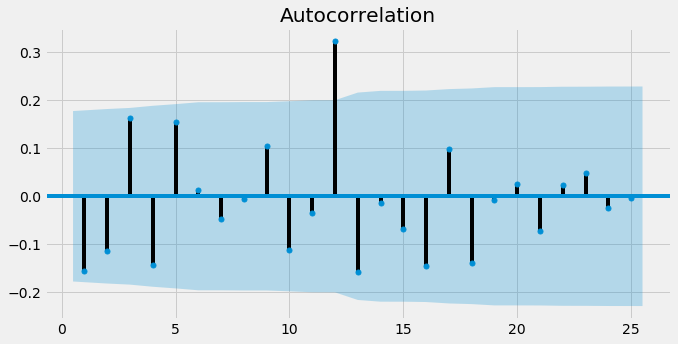

In [18]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1);

Based on this figure, 12 time steps is the time period of the seasonal component.

## SARIMA models
- Seasonal ARIMA = SARIMA
$$ \text{SARIMA}(p, d, q)(P, D, Q)_S $$
    - Non-seasonal orders
        - p: autoregressive order
        - d: differencing order
        - q: moving average order
    - Seasonal orders
        - P: seasonal autoregressive order
        - D: seasonal differencing order
        - Q: seasonal moving average order
        - S: Number of time steps per cycle
- The SARIMA model
    - ARIMA(2, 0, 1) model:
$$ y_t = a_1 y_{t-1} + a_2 y_{t-2} + m_1 \epsilon_{t-1} + \epsilon_t $$
    - $\text{SARIMA}(0,0,0)(2, 0, 1)_7$ model:
$$ y_t = a_7 y_{t-7} + a_{14} y_{t-14} + m_y \epsilon_{t-7} + \epsilon_t $$

- Seasonal differencing
    - Subtract the time series value of one season ago
$$ \Delta y_t = y_t - y_{t-S} $$

### Fitting SARIMA models
Fitting SARIMA models is the beginning of the end of this journey into time series modeling.

It is important that you get to know your way around the SARIMA model orders and so that's what you will focus on here.

In this exercise, you will practice fitting different SARIMA models to a set of time series.

In [31]:
df1 = pd.read_csv('./dataset/df1.csv', index_col=0, parse_dates=True)
df2 = pd.read_csv('./dataset/df2.csv', index_col=0, parse_dates=True)
df3 = pd.read_csv('./dataset/df3.csv', index_col=0, parse_dates=True)

In [32]:
df1 = df1.asfreq('d')
df2 = df2.asfreq('d')
df3 = df3.asfreq('d')

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMAX model
model = SARIMAX(df1, order=(1, 0, 0), seasonal_order=(1, 1, 0, 7))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 Y   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.243
Date:                           Tue, 16 Jun 2020   AIC                           1118.486
Time:                                   14:13:36   BIC                           1125.742
Sample:                               01-01-2013   HQIC                          1121.401
                                    - 03-31-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1032      0.103      1.002      0.316      -0.099       0.305
ar.S.L7        0.2781      0.104      2.665      0.008       0.074       0.483
sigma2      3.858e+04   7224.680      5.340      0.000    2.44e+04    5.27e+04
===================================================================================
Ljung-Box (Q):                       41.76   Jarque-Bera (JB):                 1.69
Prob(Q):                              0.39   Prob(JB):                         0.43
Heteroskedasticity (H):               1.35   Skew:                            -0.15
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
# Create a SARIMAX model
model = SARIMAX(df2, order=(2, 1, 1), seasonal_order=(1, 0, 0, 4))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  Y   No. Observations:                   80
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -560.340
Date:                            Tue, 16 Jun 2020   AIC                           1130.679
Time:                                    14:14:17   BIC                           1142.526
Sample:                                01-01-2013   HQIC                          1135.426
                                     - 03-21-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2701      0.162      1.672      0.095      -0.047       0.587
ar.L2          0.5015      0.110      4.560      0.000       0.286       0.717
ma.L1         -0.4271      0.178     -2.401      0.016      -0.776      -0.078
ar.S.L4        0.1075      0.127      0.847      0.397      -0.141       0.356
sigma2       8.45e+04   1.63e+04      5.178      0.000    5.25e+04    1.16e+05
===================================================================================
Ljung-Box (Q):                       30.80   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.85   Prob(JB):                         0.62
Heteroskedasticity (H):               0.60   Skew:                            -0.07
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Create a SARIMAX model
model = SARIMAX(df3, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    Y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -521.376
Date:                              Tue, 16 Jun 2020   AIC                           1048.752
Time:                                      14:14:50   BIC                           1056.149
Sample:                                  01-01-2013   HQIC                          1051.730
                                       - 04-10-2013                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4236      0.090      4.719      0.000       0.248       0.600
ma.S.L12      -0.0898      0.116     -0.776      0.438      -0.317       0.137
sigma2      9347.1462   1407.490      6.641      0.000    6588.516    1.21e+04
===================================================================================
Ljung-Box (Q):                       33.11   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.77   Prob(JB):                         0.99
Heteroskedasticity (H):               0.77   Skew:                             0.02
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Choosing SARIMA order
In this exercise you will find the appropriate model order for a new set of time series. This is monthly series of the number of employed persons in Australia (in thousands). The seasonal period of this time series is 12 months.

You will create non-seasonal and seasonal ACF and PACF plots and use the table below to choose the appropriate model orders.

|      | AR(p)                | MA(q)                | ARMA(p, q) |
|------|----------------------|----------------------|------------|
| ACF  | Tails off            | Cuts off after lag q | Tails off  |
| PACF | Cuts off after lag p | Tails off            | Tails off  |

In [36]:
aus_employment = pd.read_csv('./dataset/aus_employment.csv', index_col='date', parse_dates=True)
aus_employment = aus_employment.asfreq('MS')
aus_employment.head()

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


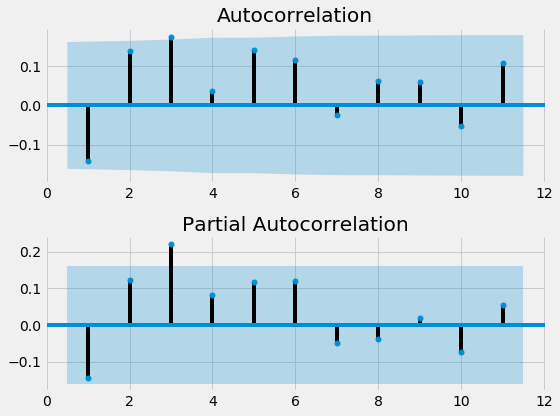

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf

# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1);

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2);
plt.tight_layout();

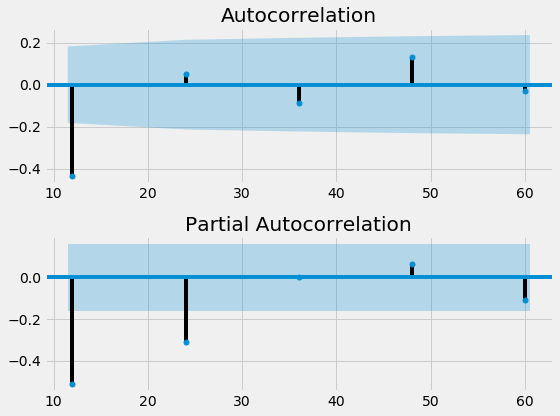

In [44]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, zero=False, ax=ax1);

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, zero=False, ax=ax2);
plt.tight_layout();

The non-seasonal ACF doesn't show any of the usual patterns of MA, AR or ARMA models so we choose none of these. The Seaosnal ACF and PACF look like an MA(1) model. : $\text{SARIMAX}(0,1,0)(0,1,1)_{12}$

### SARIMA vs ARIMA forecasts
In this exercise, you will see the effect of using a SARIMA model instead of an ARIMA model on your forecasts of seasonal time series.

Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1)12, have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC.

In the exercise you will use these two models to make dynamic future forecast for 25 months and plot these predictions alongside held out data for this period, wisconsin_test.

In [51]:
wisconsin_test = pd.read_csv('./dataset/wisconsin_test.csv', index_col='date', parse_dates=True)
wisconsin_test = wisconsin_test.asfreq('MS')
dates = wisconsin_test.index
wisconsin_test.head()

,number_in_employment
date,
1973-10-01,374.5
1973-11-01,380.2
1973-12-01,384.6
1974-01-01,360.6
1974-02-01,354.4


In [52]:
model = SARIMAX(wisconsin_test, order=(3, 1, 2), trend='c', 
                enforce_stationarity=True, enforce_invertibility=True)

arima_results = model.fit()

/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [53]:
model = SARIMAX(wisconsin_test, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12), trend='c', 
                enforce_stationarity=True, enforce_invertibility=True)

sarima_results = model.fit()

/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [54]:
arima_results.specification

{'seasonal_periods': 0,
 'measurement_error': False,
 'time_varying_regression': False,
 'simple_differencing': False,
 'enforce_stationarity': True,
 'enforce_invertibility': True,
 'hamilton_representation': False,
 'concentrate_scale': False,
 'trend_offset': 1,
 'order': (3, 1, 2),
 'seasonal_order': (0, 0, 0, 0),
 'k_diff': 1,
 'k_seasonal_diff': 0,
 'k_ar': 3,
 'k_ma': 2,
 'k_seasonal_ar': 0,
 'k_seasonal_ma': 0,
 'k_ar_params': 3,
 'k_ma_params': 2,
 'trend': 'c',
 'k_trend': 1,
 'k_exog': 0,
 'mle_regression': False,
 'state_regression': False}

In [55]:
sarima_results.specification

{'seasonal_periods': 12,
 'measurement_error': False,
 'time_varying_regression': False,
 'simple_differencing': False,
 'enforce_stationarity': True,
 'enforce_invertibility': True,
 'hamilton_representation': False,
 'concentrate_scale': False,
 'trend_offset': 1,
 'order': (0, 1, 1),
 'seasonal_order': (1, 1, 1, 12),
 'k_diff': 1,
 'k_seasonal_diff': 1,
 'k_ar': 0,
 'k_ma': 1,
 'k_seasonal_ar': 12,
 'k_seasonal_ma': 12,
 'k_ar_params': 0,
 'k_ma_params': 1,
 'trend': 'c',
 'k_trend': 1,
 'k_exog': 0,
 'mle_regression': False,
 'state_regression': False}

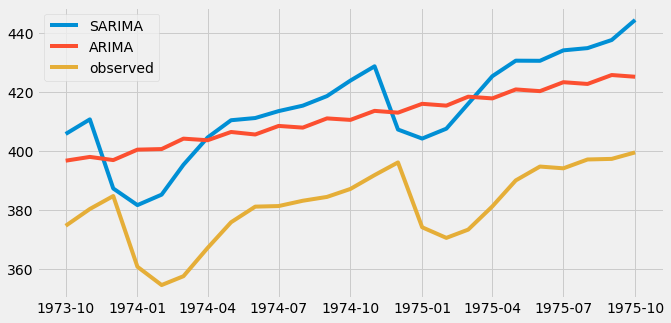

In [58]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA');
plt.plot(dates, arima_mean, label='ARIMA');
plt.plot(wisconsin_test, label='observed');
plt.legend();

## Automation and saving
- pmdarima packages for Automated model selection

### Automated model selection
The ```pmdarima``` package is a powerful tool to help you choose the model orders. You can use the information you already have from the identification step to narrow down the model orders which you choose by automation.

Remember, although automation is powerful, it can sometimes make mistakes that you wouldn't. It is hard to guess how the input data could be imperfect and affect the test scores.

In this exercise you will use the pmdarima package to automatically choose model orders for some time series datasets.

In [61]:
import pmdarima as pm

# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1,
                      max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(1,1,1,7) [intercept=True]; AIC=1125.412, BIC=1144.763, Time=0.551 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1124.433, BIC=1129.271, Time=0.022 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1120.434, BIC=1130.109, Time=0.112 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1122.218, BIC=1131.893, Time=0.070 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1122.596, BIC=1125.015, Time=0.006 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1125.048, BIC=1132.305, Time=0.016 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1119.909, BIC=1132.004, Time=0.210 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1121.791, BIC=1136.304, Time=0.201 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1120.954, BIC=1133.049, Time=0.159 seconds
Fit ARIMA(0,0,0)x(2,1,0,7) [intercept=True]; AIC=1119.066, BIC=1128.742, Time=0.160 seconds
Fit ARIMA(0,0,0)x(1,1,0,7) [intercep

In [62]:
# Create model
model2 = pm.auto_arima(df2,
                       seasonal=False,
                       d=1,
                       trend='c',
                      max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model2.summary())

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=1131.956, BIC=1146.173, Time=0.104 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=1153.963, BIC=1158.702, Time=0.005 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=1155.355, BIC=1162.464, Time=0.027 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=1155.747, BIC=1162.855, Time=0.012 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=1153.963, BIC=1158.702, Time=0.005 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=1136.103, BIC=1147.950, Time=0.113 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=1130.992, BIC=1142.840, Time=0.057 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=1149.020, BIC=1158.498, Time=0.089 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=1132.526, BIC=1142.003, Time=0.066 seconds
Total fit time: 0.486 seconds
                               SARIMAX Results                                
Dep. Variable:     

In [63]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1,
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model3.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(1,1,1,7) [intercept=True]; AIC=1566.379, BIC=1581.510, Time=0.413 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1595.826, BIC=1600.870, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1585.203, BIC=1595.290, Time=0.088 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1572.745, BIC=1582.832, Time=0.210 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1593.897, BIC=1596.419, Time=0.008 seconds
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=1558.168, BIC=1570.777, Time=0.291 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(1,1,0,7) [intercept=True]; AIC=1565.768, BIC=1578.377, Time=0.257 seco

### Saving and updating models
Once you have gone through the steps of the Box-Jenkins method and arrived at a model you are happy with, you will want to be able to save that model and also to incorporate new measurements when they are available. This is key part of putting the model into production.

In this exercise you will save a freshly trained model to disk, then reload it to update it with new data.

In [65]:
import joblib

# Set model name
filename='candy_model.pkl'

# Pickle it
joblib.dump(model1, filename)

# Load the model back in
loaded_model = joblib.load(filename)

# Update the model
# loaded_model.update(df)

## SARIMA and Box-Jenkins
- Box-Jenkins with seasonal data
    - Determine if time series is seasonal
    - Find seasonal period
    - Find transforms to make data stationary
        - Seasonal and non-seasonal differencing
        - Other transforms

### SARIMA model diagnostics
Usually the next step would be to find the order of differencing and other model orders. However, this time it's already been done for you. The time series is best fit by a $\text{SARIMA}(1, 1, 1)(0, 1, 1)_{12}$ model with an added constant.

In this exercise you will make sure that this is a good model by first fitting it using the ```SARIMAX``` class and going through the normal model diagnostics procedure.

In [67]:
co2 = pd.read_csv('./dataset/co2.csv', index_col='date', parse_dates=True)
co2 = co2.asfreq('MS')
co2.head()

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


In [68]:
# Create model object
model = SARIMAX(co2, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), trend='c')

# Fit model
results = model.fit()

In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Tue, 16 Jun 2020   AIC                            369.437
Time:                                    15:17:03   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.809      0.005       0.001       0.003
ar.L1          0.2411      0.078      3.072      0.002       0.087       0.395
ma.L1         -0.6079      0.065     -9.296      0.000      -0.736      -0.480
ma.S.L12      -0.8820      0.019    -45.520      0.000      -0.920      -0.844
sigma2         0.0944      0.005     20.750      0.000       0.085       0.103
===================================================================================
Ljung-Box (Q):                       47.00   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.21   Prob(JB):                         0.05
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

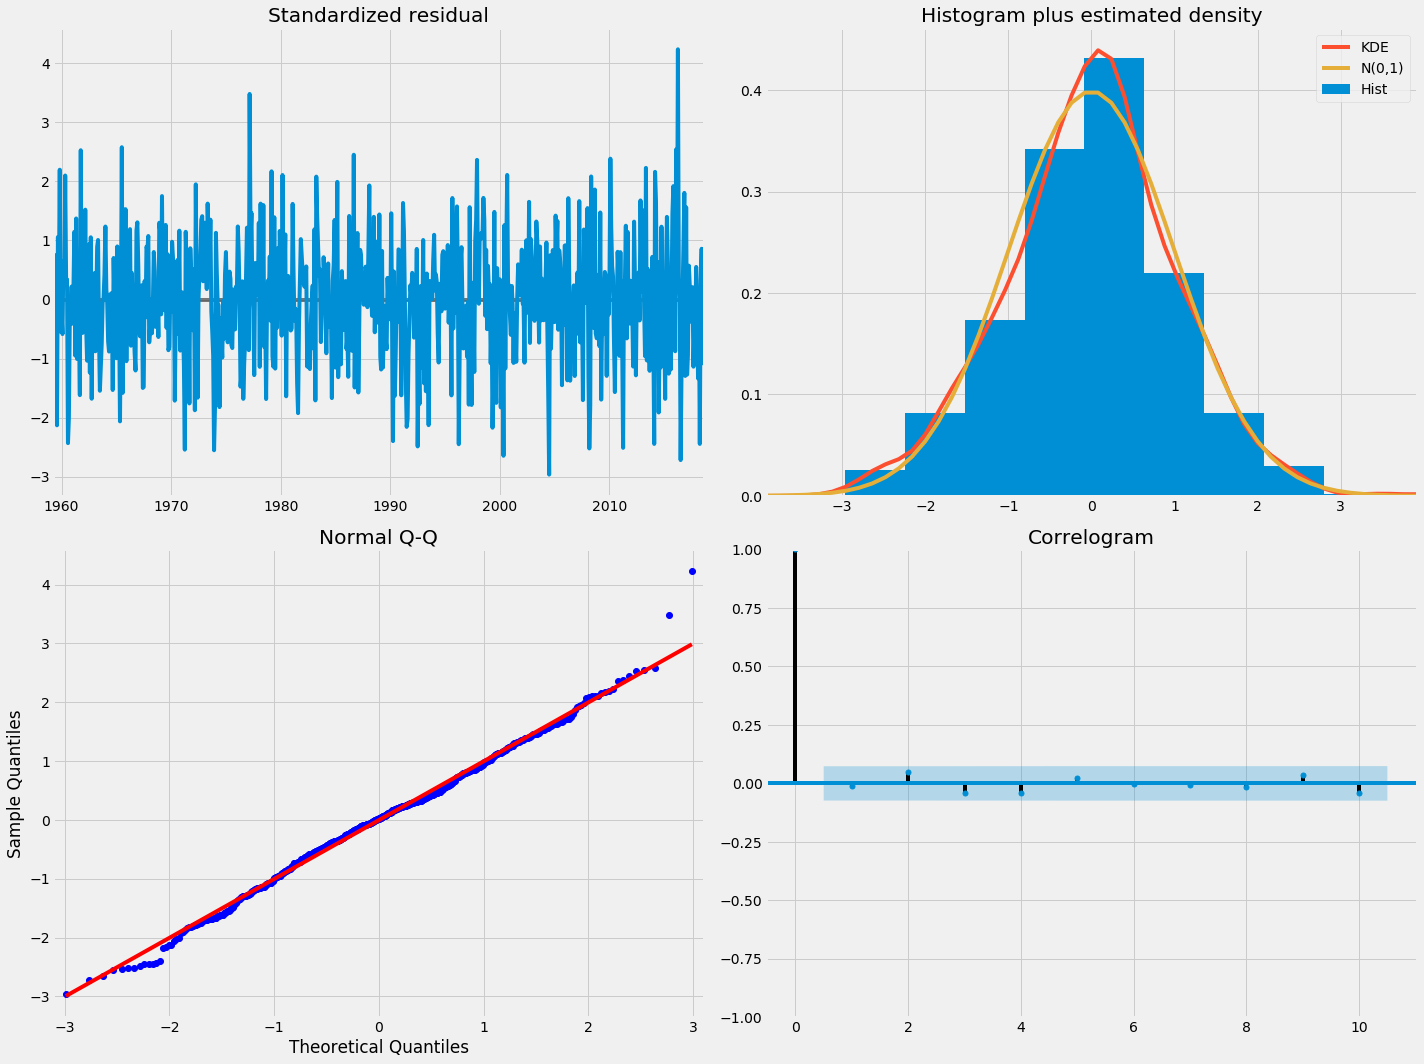

In [70]:
# Plot common diagnostics
results.plot_diagnostics(figsize=(20, 15));
plt.tight_layout();

### SARIMA forecast
In the previous exercise you confirmed that a SARIMA (1,1,1) x (0,1,1)12 model was a good fit to the CO2 time series by using diagnostic checking.

Now its time to put this model into practice to make future forecasts. Climate scientists tell us that we have until 2030 to drastically reduce our CO2 emissions or we will face major societal challenges.

In this exercise, you will forecast the CO2 time series up to the year 2030 to find the CO2 levels if we continue emitting as usual.

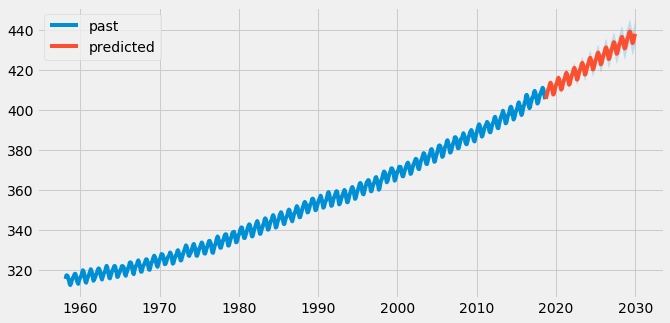

In [73]:
# Create forecast object
forecast_object = results.get_forecast(136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past');

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted');

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.loc[:, 'lower CO2_ppm'], 
                 conf_int.loc[:, 'upper CO2_ppm'], alpha=0.2);

# Plot legend
plt.legend();

In [74]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

438.2001450227593
lower CO2_ppm    432.118155
upper CO2_ppm    444.282135
Name: 2030-01-01 00:00:00, dtype: float64


### The SARIMAX model

**S** - seasonal\
**AR** - AutoRegressive\
**I** - Integrated\
**MA** - Moving Average\
**X** - Exogenous
